In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file= r"C:\Users\José Martins\Desktop\LABS and PROJECTS\WEEK 5\LAB 1\amz_uk_price_prediction_dataset.csv"


df = pd.read_csv(file)


display(df.head())


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## 1

In [23]:
display(df['category'].value_counts())  #freq. table



top5=df['category'].value_counts().head(5) #top 5
display(top5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

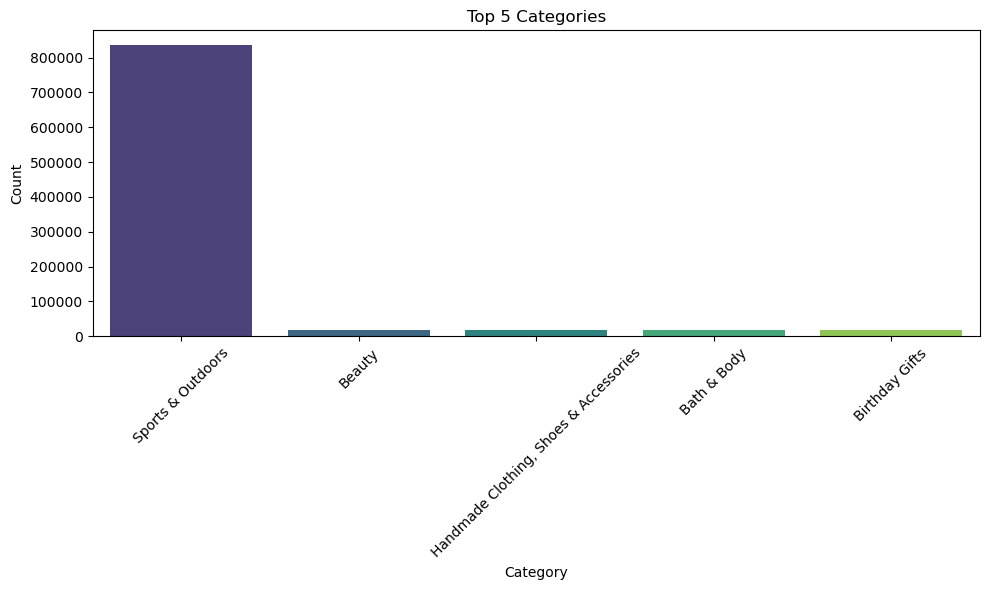

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, order=top5.index, palette='viridis')
plt.title('Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

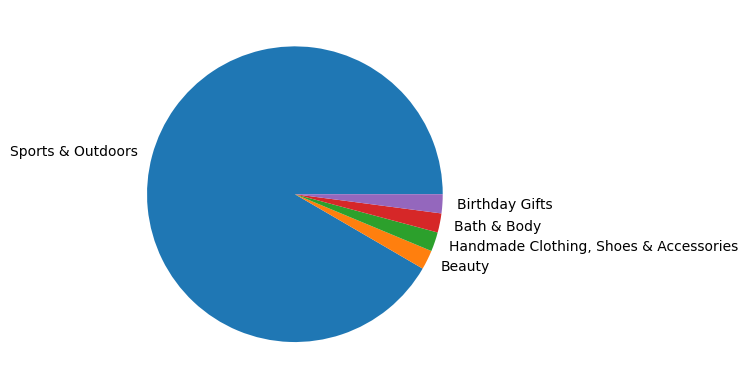

In [32]:
y = top5
mylabels = top5.index

plt.pie(y, labels = mylabels)
plt.show() 

## 2 Delving into Product Pricing

In [41]:
print(f"Mean:",df['price'].mean()) 
print(f"Median:",df['price'].median()) 
print(f"Mode:",df['price'].mode()[0]) 

Mean: 89.24380943923663
Median: 19.09
Mode: 9.99


In [42]:
#the average price is the mean of the prices, so 89,2, since the mode is 9.99 
#we can undersatnd that there are some values that are so big that influenciate the mean, however the most frequent price is 9.99

In [45]:
variance = df['price'].var()
std_deviation = df['price'].std()

# Range
price_range = df['price'].max() - df['price'].min()

Q1 = df['product_price'].quantile(0.25)
Q3 = df['product_price'].quantile(0.75)
IQR = Q3 - Q1

print("Variance:", variance)
print("Standard Deviation:", std_deviation)
print("Range:", price_range)
print("Interquartile Range (IQR):", IQR)


Variance: 119445.48532256528
Standard Deviation: 345.60886175352226
Range: 100000.0


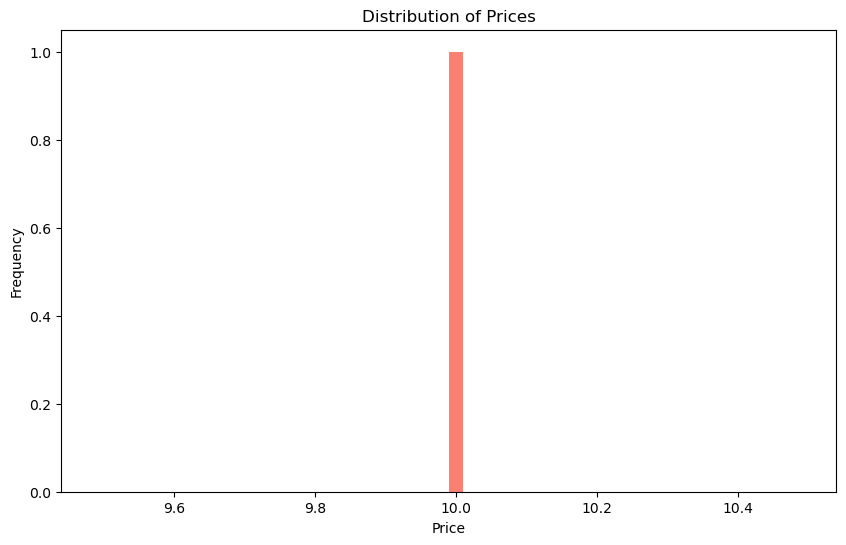

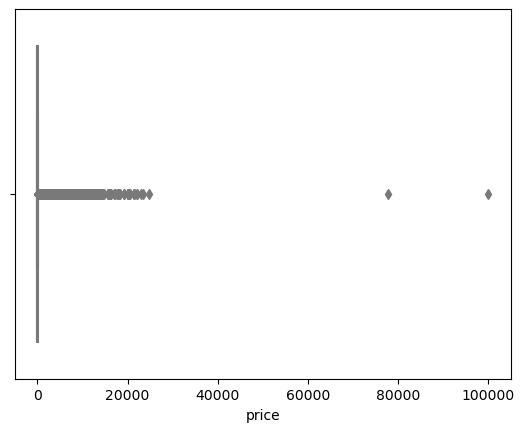

In [62]:
Q1 = df['price'].quantile(0.25) #selected only the 1st quarter to analize the range where prices fall the most

plt.figure(figsize=(10, 6))
plt.hist(Q1, bins=50, color='salmon')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()




sns.boxplot(x = df['price'], color="lightblue"); #some big outiler prices that alter the mean

# 3 Unpacking Product Ratings

In [69]:
print(f"Mean:",df['stars'].mean()) 
print(f"Median:",df['stars'].median()) 
print(f"Mode:",df['stars'].mode()[0]) 


#the common trend seems to be a 0 star rating, this ccan be due to porr quality of product or default value taken when customers dotn rate

Mean: 2.152836472966065
Median: 0.0
Mode: 0.0


In [82]:
variance = df['stars'].var()
std_deviation = df['stars'].std()

# Range
rating_range = df['stars'].max() - df['stars'].min()

Q1_stars = df['stars'].quantile(0.25)
Q3_stars = df['stars'].quantile(0.75)
IQR = Q3_stars - Q1_stars

print("Variance:", variance)
print("Standard Deviation:", std_deviation)
print("Range:", rating_range)
print("Interquartile Range (IQR):", IQR)

Variance: 4.81743402976196
Standard Deviation: 2.1948653785054697
Range: 5.0
Interquartile Range (IQR): 4.4


In [77]:
skew_df=df['stars'].skew()

if skew_df > 0:
    print('Skewed to the right, lean to lower values')
elif skew_df < 0:
    print('Skewed to the left, lean to higher values')
elif skew_df == 0:
    print('No skew')

Skewed to the right, lean to lower values


In [76]:
kurt_df=df['stars'].kurtosis()

print(f"Kurtosis: ", kurt_df)

Kurtosis:  -1.9260061280432985


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


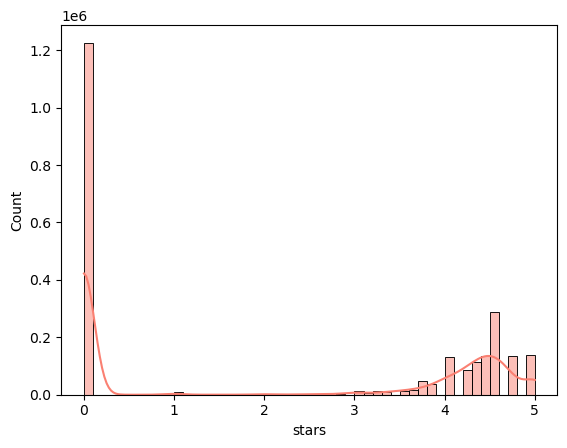

In [80]:
sns.histplot(df['stars'], kde=True, bins=50, color="salmon");

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


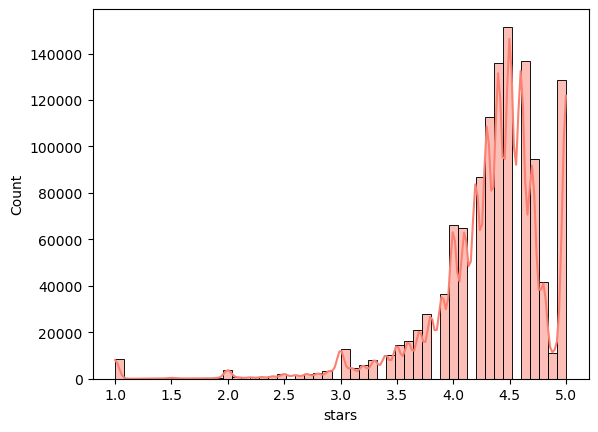

In [90]:
# Drop rows where 'stars' column has value 0.0
df_cleaned = df[df['stars'] != 0.0]

#decided to cleann all 0 vlaues to better analysis
sns.histplot(df_cleaned['stars'], kde=True, bins=50, color="salmon");

# Analysis with cleaned data

In [91]:
print(f"Mean:",df_cleaned['stars'].mean()) 
print(f"Median:",df_cleaned['stars'].median()) 
print(f"Mode:",df_cleaned['stars'].mode()[0]) 


Mean: 4.31916076222691
Median: 4.4
Mode: 4.5


In [92]:
variance = df_cleaned['stars'].var()
std_deviation = df_cleaned['stars'].std()

# Range
rating_range = df_cleaned['stars'].max() - df_cleaned['stars'].min()

Q1_stars = df_cleaned['stars'].quantile(0.25)
Q3_stars = df_cleaned['stars'].quantile(0.75)
IQR = Q3_stars - Q1_stars

print("Variance:", variance)
print("Standard Deviation:", std_deviation)
print("Range:", rating_range)
print("Interquartile Range (IQR):", IQR)

Variance: 0.3083433752380519
Standard Deviation: 0.5552867504614637
Range: 4.0
Interquartile Range (IQR): 0.5


In [93]:
skew_dfc=df_cleaned['stars'].skew()

if skew_dfc > 0:
    print('Skewed to the right, lean to lower values')
elif skew_dfc < 0:
    print('Skewed to the left, lean to higher values')
elif skew_dfc == 0:
    print('No skew')

Skewed to the left, lean to higher values


In [94]:
kurt_dfc=df_cleaned['stars'].kurtosis()

print(f"Kurtosis: ", kurt_dfc)

Kurtosis:  9.78193769066435
